In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score 
from sklearn.metrics import average_precision_score

In [2]:
df = pd.read_csv("F:\Machine Learning\Class 09 - Result Analysis\\heart failure.csv")
df.head(12)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

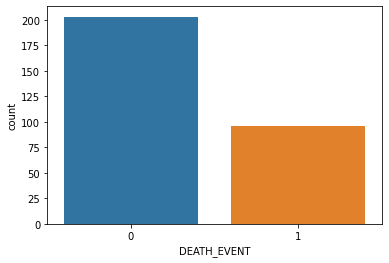

In [5]:
sns.countplot(x='DEATH_EVENT', data=df)

In [6]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

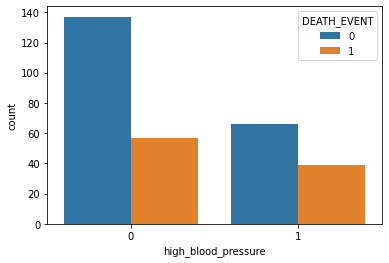

In [7]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

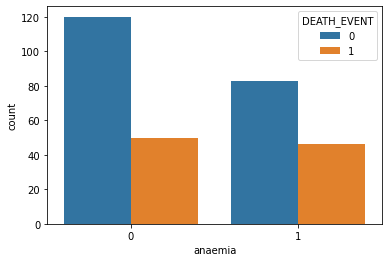

In [8]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='time', ylabel='count'>

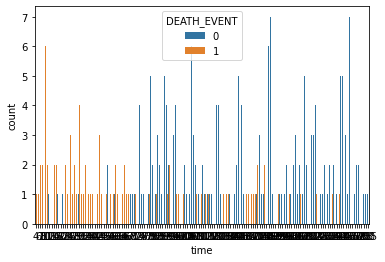

In [9]:
sns.countplot(x='time', hue='DEATH_EVENT', data=df)

In [10]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [11]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [13]:
x.shape

(299, 12)

In [14]:
y.shape

(299,)

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .30)

In [16]:
xtest.shape

(90, 12)

In [17]:
ytest.head()

297    0
170    0
80     0
198    0
291    0
Name: DEATH_EVENT, dtype: int64

In [18]:
clf = DecisionTreeClassifier()

In [19]:
 clf.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [20]:
pred = clf.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [21]:
clf.score(xtest, ytest)

0.8111111111111111

[Text(1041.267857142857, 1568.076923076923, 'X[11] <= 67.0\ngini = 0.439\nsamples = 209\nvalue = [141, 68]'),
 Text(398.57142857142856, 1442.6307692307691, 'X[4] <= 71.0\ngini = 0.194\nsamples = 46\nvalue = [5, 41]'),
 Text(318.85714285714283, 1317.1846153846154, 'X[2] <= 83.0\ngini = 0.162\nsamples = 45\nvalue = [4, 41]'),
 Text(159.42857142857142, 1191.7384615384615, 'X[8] <= 134.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(79.71428571428571, 1066.2923076923075, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(239.1428571428571, 1066.2923076923075, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(478.2857142857142, 1191.7384615384615, 'X[4] <= 47.5\ngini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(398.57142857142856, 1066.2923076923075, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(558.0, 1066.2923076923075, 'X[2] <= 221.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(478.2857142857142, 940.8461538461538, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(63

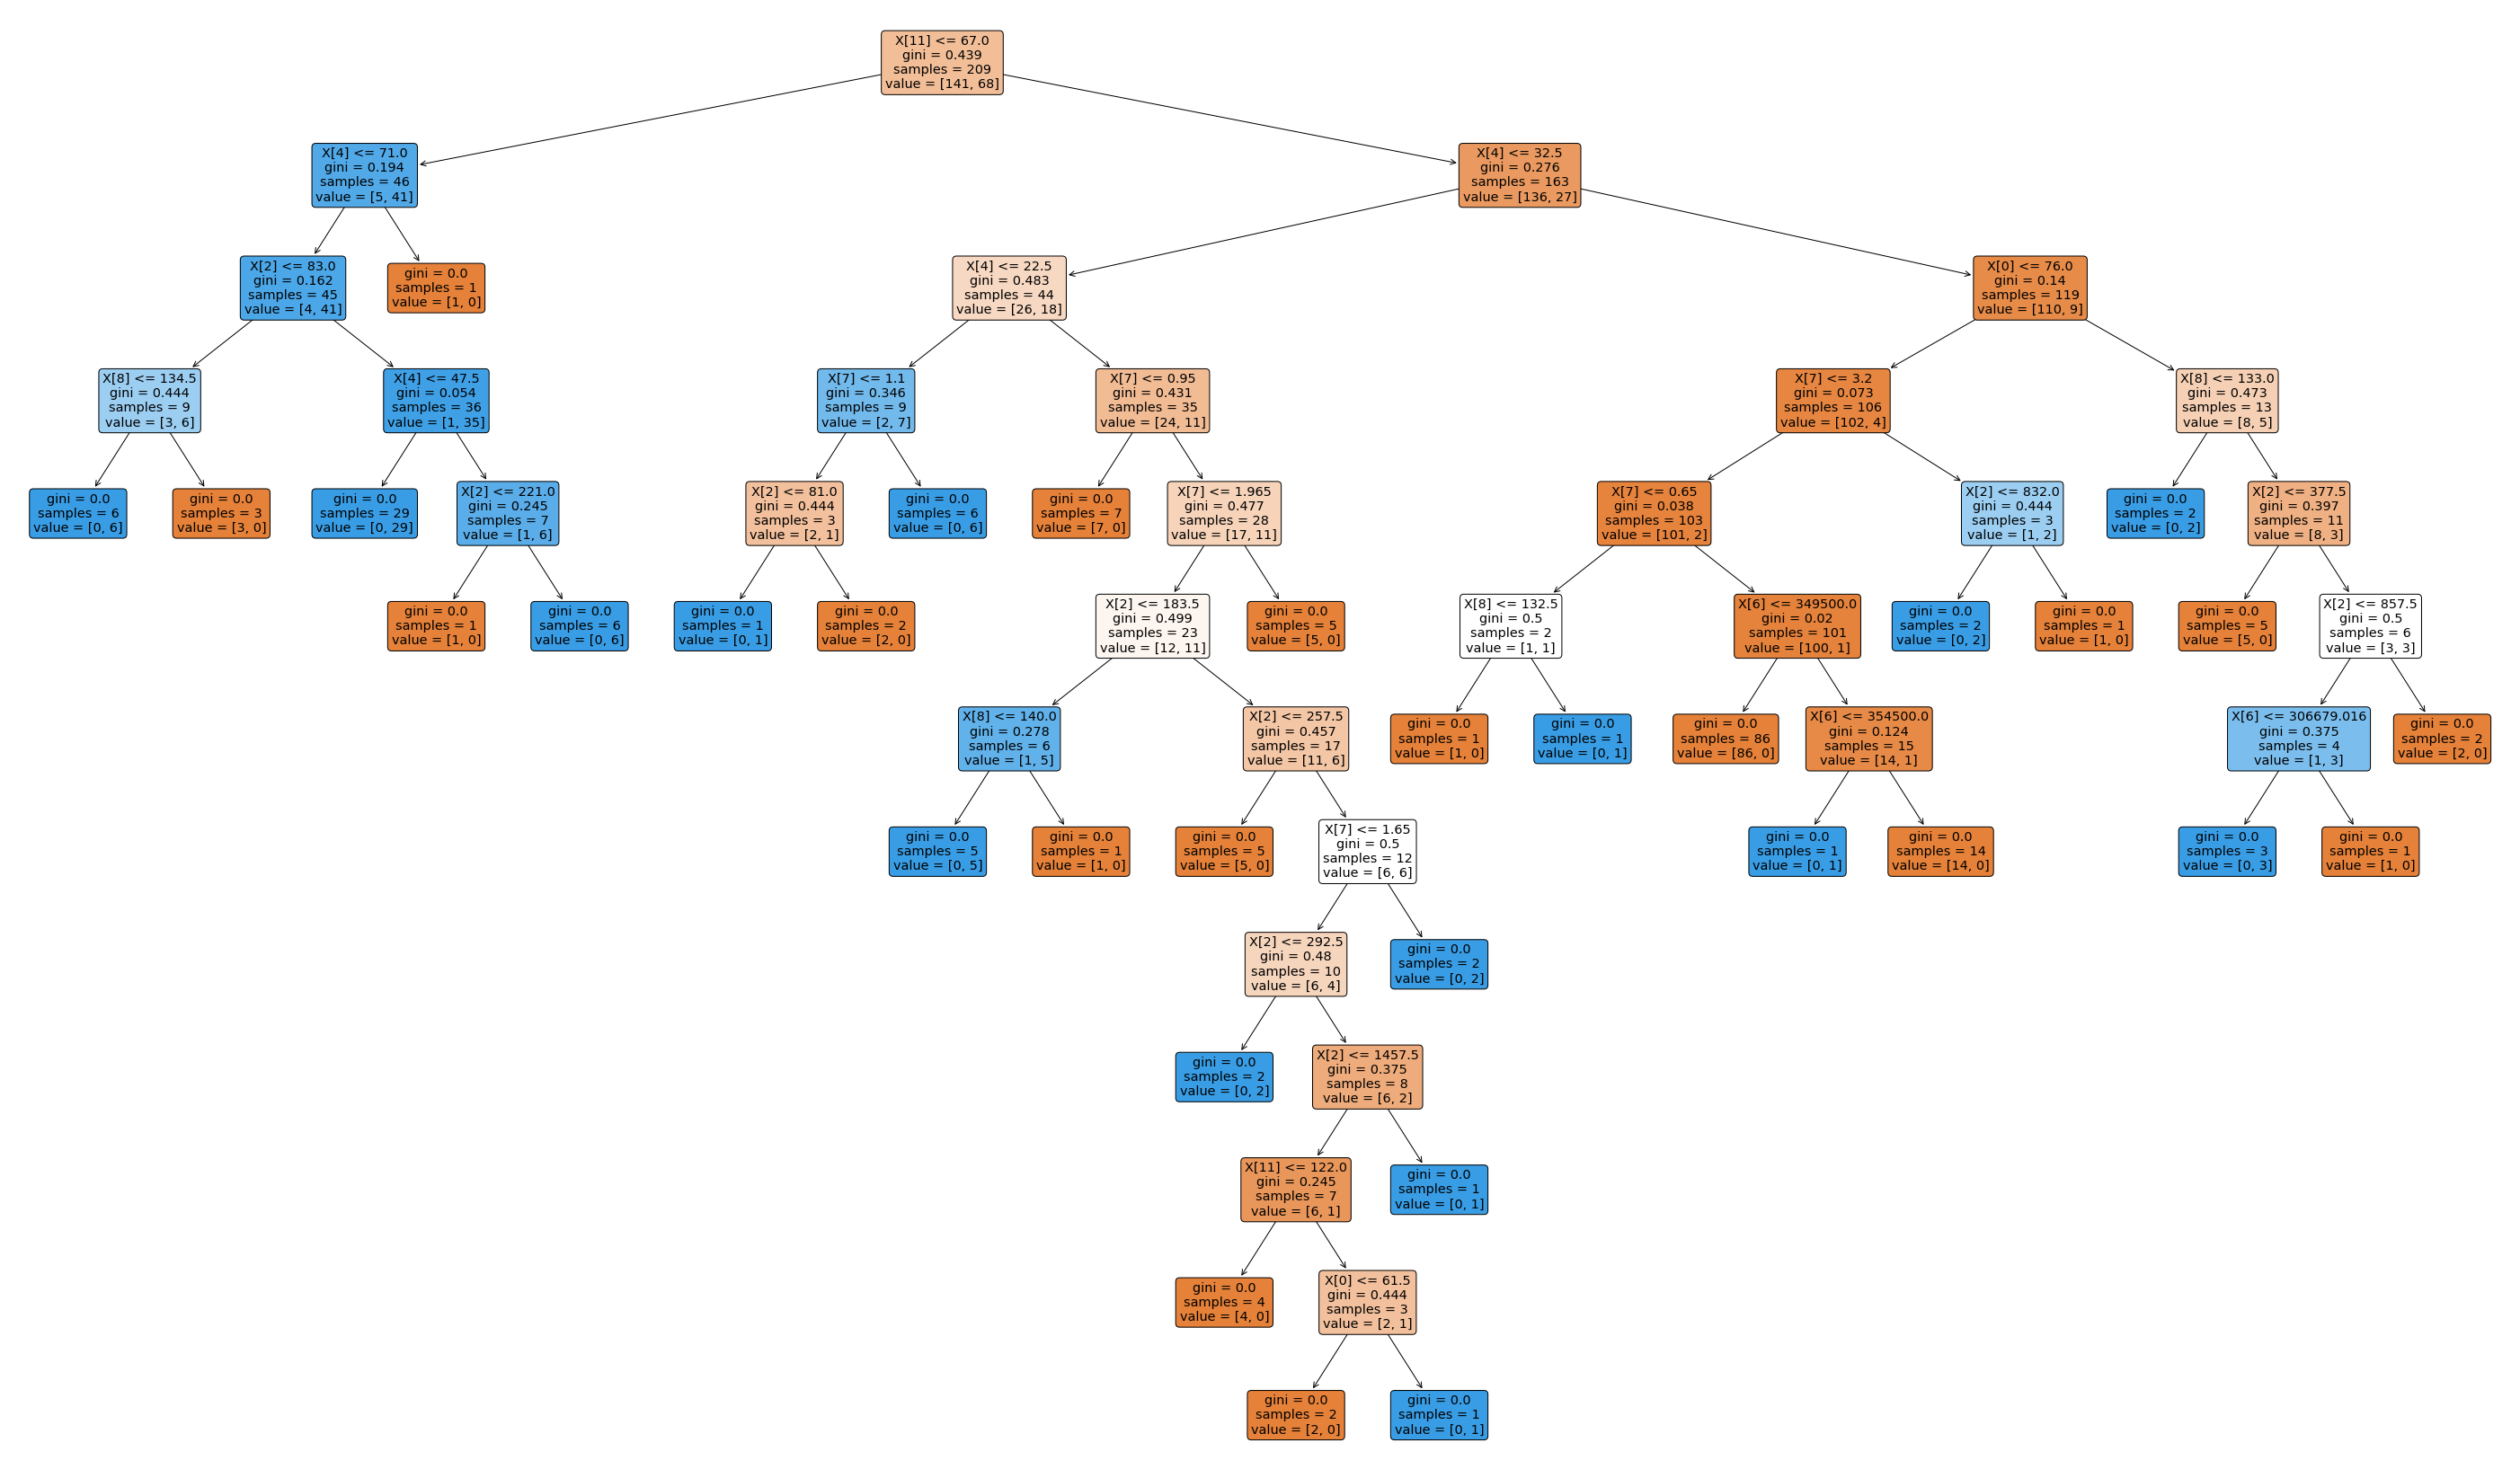

In [22]:
plt.figure(figsize=(50,30))
tree.plot_tree(clf, filled=True, rounded = True)

In [23]:
cm = confusion_matrix(ytest, pred)
cm

array([[52, 10],
       [ 7, 21]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

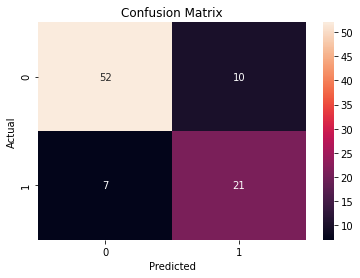

In [24]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

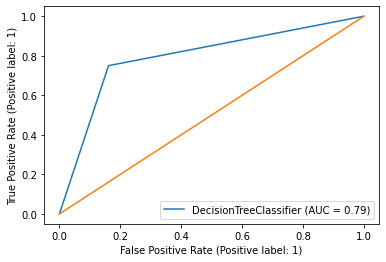

In [29]:
roc = plot_roc_curve(clf, xtest, ytest)
roc
plt.plot([0,1],[0,1])

In [30]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.68      0.75      0.71        28

    accuracy                           0.81        90
   macro avg       0.78      0.79      0.79        90
weighted avg       0.82      0.81      0.81        90



In [41]:
ytest.value_counts() ##support

0    62
1    28
Name: DEATH_EVENT, dtype: int64